In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
### The Data Science Process
# Problem Statement/Purpose: The purpose of data science project is to analyze a dataset to generate the best linear model 
#                             possible to predict the sales price of a house given various features. 
#                  
# Analyzing Process and Goals: The linear model will primarily be developed with exploratory data analysis, visualizations, and
#                              linear regression analysis. Evaluation of our model will primarily be described with linear regresion
#                              metrics and train test splitting and cross validation

# Why is this important? Models generated from this data may be very important to people working in the real-estate industry
#                        People within the real-estate industry may use this models to make recommendations and determine sale prices
#                        Perhaps people can use models to also see if they are getting a good deal when looking for property.




In [3]:
df = pd.read_csv('./datasets/train.csv')
df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [4]:
#Exploratory Data Analysis
df.isnull().sum().sort_values(ascending = False).head(26) #There are 26 columns with null values.

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
dtype: int64

In [5]:
#Analyzing all the NAN values. Most of them simply mean the feature does not exist  
# There are 2051 houses and that meanas only 9 of them or less than .5% have pools. Therefore, it can be dropped as
# it would not make a significant impact on our model.

df = df.drop(columns = ['Pool QC', 'Pool Area'])

# The Misc_Feature indicates that there are only 65 houses or 3% of houses with additional features. 
# Some of the Misc features could of had a significant impact on the cost of the house. Only the cost matters.

df = df.drop(columns = ['Misc Feature'])

# 131 or 6.4% houses have alleyways. They may have a small impact on our model. However, the data within alleys indicate
# whether the alley is graveled or paved. So, we can map each NAN value to 0 and everything else to 1.

df['Alley'] = df['Alley'].map({'Grvl': 1, 'Pave': 1, np.nan: 0})

# 400 or 20% of the houses have fences. This can make a signficant impact to the model.

df['Fence'] = df['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0})

# More than half of the houses have fireplaces, making a potential impact on the model

df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})

# 84% of houses have recorded data of Lot Frontage and represents linear feet of street connecred to property.

df['Lot Frontage'] = df['Lot Frontage'].replace(np.nan, 0)

# Garage Finish represents how much of the garage is completed. Almost all the houses have garages.

df['Garage Finish'] = df['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0})

# Garage Condition: There are 1868 garages out of 1928 garages that are in typical/average condition. This would not make
# too much of an impact on the model, therefore, the column can be removed. 
df[df['Garage Cond'] == 'TA'].shape

df = df.drop(columns = ['Garage Cond'])

# Garage Quality: There are 1868 garages out of 1928 garages that are in typical/average condition. This would not make
# too much of an impact on the model, therefore, the column can be removed. 

df[df['Garage Qual'] == 'TA'].shape

df = df.drop(columns = ['Garage Qual'])

#Garage Area, Cars

df['Garage Area'] = df['Garage Area'].replace(np.nan, 0)
df['Garage Cars'] = df['Garage Cars'].replace(np.nan, 0)

#Garage Type mapping
df['Garage Type'] = df['Garage Type'].replace(np.nan , 0)
df = pd.get_dummies(df, columns = ['Garage Type'])

#Garage Year Built NAN reaplacement

df['Garage Yr Blt'] = df['Garage Yr Blt'].replace(np.nan, 0)

#Age of Garage
df['Garage Age'] = df['Year Built'] - df['Garage Yr Blt']

# Garage ETC
df['Garage Area'] = df['Garage Area'].replace(np.nan, 0)

# Basement drops
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].replace(np.nan, 0)
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].replace(np.nan, 0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].replace(np.nan, 0)
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].replace(np.nan, 0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].replace(np.nan, 0)
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].replace(np.nan, 0)

# Basement maps
# Refers to walkout or garden level walls
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0})

# Evaluates the general condition of the basement
df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})

# Evaluates the height of the basement
df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})

# Rating of basement finished area
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ': 7,'ALQ': 6,'BLQ': 5,'Rec': 4, 'LwQ': 3, 'Fa': 2, 'Unf': 1, np.nan: 0})

# Rating of basement finished area (if multiple types)
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ': 7,'ALQ': 6,'BLQ': 5,'Rec': 4, 'LwQ': 3, 'Fa': 2, 'Unf': 1, np.nan: 0})

# Mapping Exterior
df['Exter Qual'] = df['Exter Qual'].map({'Gd': 4, 'TA': 3, 'FA': 2, 'Po': 1})
df['Exter Cond'] = df['Exter Cond'].map({'Gd': 4, 'TA': 3, 'FA': 2, 'Po': 1})

# Mas Vnr Area
df = pd.get_dummies(df, columns = ['Mas Vnr Type'])
df['Mas Vnr Area'] = df['Mas Vnr Area'].replace(np.nan, 0)

# Drop Streets and Utilities due to less than .5 being paved%
df = df.drop(columns = ['Street'])
df = df.drop(columns = ['Utilities'])

# Neighborhood

df = pd.get_dummies(df, columns = ['Neighborhood'])

# Drop month sold due to its tendency not to affect the prices by much
df = df.drop(columns = ['Mo Sold'])

# Functionality mapping
df['Functional'] = df['Functional'].map({'Typ' : 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1})

# The Sale Price is not dependent on sale type because the sale type affects how much the person actually pays for the property.
df = df.drop(columns = ['Sale Type'])

#Other dummy catagorical
df = pd.get_dummies(df, columns = ['Paved Drive', 'Foundation', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                                  'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Land Contour', 'Lot Config', 'Land Slope'
                                  , 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'MS Zoning'], drop_first = True)
df.isnull().sum().sort_values(ascending = False).head(60)

Exter Qual              107
Exter Cond               56
MS Zoning_RM              0
Neighborhood_Crawfor      0
Neighborhood_CollgCr      0
Neighborhood_ClearCr      0
Neighborhood_BrkSide      0
Neighborhood_BrDale       0
Neighborhood_Blueste      0
Neighborhood_Blmngtn      0
Mas Vnr Type_Stone        0
Mas Vnr Type_None         0
Mas Vnr Type_BrkFace      0
Neighborhood_Gilbert      0
Mas Vnr Type_BrkCmn       0
Garage Age                0
Garage Type_Detchd        0
Garage Type_CarPort       0
Garage Type_BuiltIn       0
Garage Type_Basment       0
Garage Type_Attchd        0
Garage Type_2Types        0
Garage Type_0             0
SalePrice                 0
Neighborhood_Edwards      0
Neighborhood_Greens       0
Misc Val                  0
Neighborhood_GrnHill      0
Paved Drive_Y             0
Paved Drive_P             0
Neighborhood_Veenker      0
Neighborhood_Timber       0
Neighborhood_StoneBr      0
Neighborhood_Somerst      0
Neighborhood_SawyerW      0
Neighborhood_Sawyer 

In [6]:
df.dtypes.head(60)
df = df.drop(columns = ['PID'])

In [7]:
#Feature Engineering

# Fireplace
df['Fireplace Aspect'] = df['Fireplaces'] * df['Fireplace Qu'] #Fireplace

# Kitchen
df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
df['Kitchen'] = df['Kitchen AbvGr'] * df['Kitchen Qual']

# Roof 
# df['Roof Style/ RoofMatl'] = df['Roof Style'] * df['Roof Matl']

# Lot
df['Lot Shape'] = df['Lot Shape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
df['Lot'] = df['Lot Shape'] * df['Lot Frontage'] * df['Lot Area']

# Age of house when sold
df['age'] = df['Yr Sold'] - df['Year Built'] 

#Basement

df['basement rating'] = df['Bsmt Qual'] * df['Bsmt Cond'] * df['Bsmt Exposure'] * df['Total Bsmt SF']

#Garage 

df['GarageRating'] = df['Garage Area'] + df['Garage Cars'] * df['Garage Finish']

#House Condition 

df['HouseCondition'] = df['Overall Qual'] + df['Overall Cond']

#Interior House Square Feet Combined

df['interiorspace'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Gr Liv Area']

# Exterior Condition

df['ExteriorCondition'] = df['Exter Qual'] * df['Exter Cond']

# All baths in the house

df['bath_total'] = df['Bsmt Full Bath'] + df['Full Bath'] + .5 * df['Bsmt Half Bath'] + .5 * df['Bsmt Half Bath']

df = df.drop(columns = ['Kitchen AbvGr', 'Kitchen Qual', 'Fireplaces', 'Fireplace Qu', 'Lot Shape', 'Lot Frontage', 'Lot Area', 'Yr Sold', 'Year Built', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Total Bsmt SF'
                       ,'Garage Area', 'Garage Cars', 'Garage Finish', 'Gr Liv Area', '2nd Flr SF', '1st Flr SF', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Full Bath', 'Full Bath', 'Bsmt Half Bath', 'Bsmt Half Bath'])

In [8]:
df.dtypes.head(60)

Id                        int64
MS SubClass               int64
Alley                     int64
Year Remod/Add            int64
Mas Vnr Area            float64
BsmtFin Type 1            int64
BsmtFin SF 1            float64
BsmtFin Type 2            int64
BsmtFin SF 2            float64
Bsmt Unf SF             float64
Low Qual Fin SF           int64
Half Bath                 int64
Bedroom AbvGr             int64
TotRms AbvGrd             int64
Functional                int64
Garage Yr Blt           float64
Wood Deck SF              int64
Open Porch SF             int64
Enclosed Porch            int64
3Ssn Porch                int64
Screen Porch              int64
Fence                     int64
Misc Val                  int64
SalePrice                 int64
Garage Type_0             uint8
Garage Type_2Types        uint8
Garage Type_Attchd        uint8
Garage Type_Basment       uint8
Garage Type_BuiltIn       uint8
Garage Type_CarPort       uint8
Garage Type_Detchd        uint8
Garage A

In [9]:
df.shape

(2051, 173)

In [10]:
df.isnull().sum().sort_values(ascending = False).head(60)

ExteriorCondition       146
Neighborhood_NoRidge      0
Neighborhood_Timber       0
Neighborhood_StoneBr      0
Neighborhood_Somerst      0
Neighborhood_SawyerW      0
Neighborhood_Sawyer       0
Neighborhood_SWISU        0
Neighborhood_OldTown      0
Neighborhood_NridgHt      0
Neighborhood_NWAmes       0
Paved Drive_P             0
Neighborhood_NPkVill      0
Neighborhood_NAmes        0
Neighborhood_Mitchel      0
Neighborhood_MeadowV      0
Neighborhood_Landmrk      0
Neighborhood_IDOTRR       0
Neighborhood_GrnHill      0
Neighborhood_Greens       0
Neighborhood_Veenker      0
Paved Drive_Y             0
Neighborhood_Edwards      0
Roof Matl_CompShg         0
Exterior 1st_CBlock       0
Exterior 1st_BrkFace      0
Exterior 1st_BrkComm      0
Exterior 1st_AsphShn      0
Roof Matl_WdShngl         0
Roof Matl_WdShake         0
Roof Matl_Tar&Grv         0
Roof Matl_Membran         0
Roof Style_Shed           0
Foundation_CBlock         0
Roof Style_Mansard        0
Roof Style_Hip      

In [11]:
df.dtypes.head(60)


Id                        int64
MS SubClass               int64
Alley                     int64
Year Remod/Add            int64
Mas Vnr Area            float64
BsmtFin Type 1            int64
BsmtFin SF 1            float64
BsmtFin Type 2            int64
BsmtFin SF 2            float64
Bsmt Unf SF             float64
Low Qual Fin SF           int64
Half Bath                 int64
Bedroom AbvGr             int64
TotRms AbvGrd             int64
Functional                int64
Garage Yr Blt           float64
Wood Deck SF              int64
Open Porch SF             int64
Enclosed Porch            int64
3Ssn Porch                int64
Screen Porch              int64
Fence                     int64
Misc Val                  int64
SalePrice                 int64
Garage Type_0             uint8
Garage Type_2Types        uint8
Garage Type_Attchd        uint8
Garage Type_Basment       uint8
Garage Type_BuiltIn       uint8
Garage Type_CarPort       uint8
Garage Type_Detchd        uint8
Garage A

In [12]:
df['SalePrice'].describe() 

#The average sale price of a property is $181470 rounded up

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [13]:
x = df.corr()['SalePrice'].sort_values(ascending = False).head(7)
x

# From the correlation data we have, we can see that the 6 highest variables that correlate to the sales price involve
# Garage Rating, space, basement rating, house condition, number of baths, and year remodd/add

SalePrice          1.000000
interiorspace      0.702059
GarageRating       0.652901
basement rating    0.642479
HouseCondition     0.597729
bath_total         0.569242
Year Remod/Add     0.550370
Name: SalePrice, dtype: float64

In [14]:
df['SalePrice'].describe() 

#The average sale price of a property is $181470 rounded up

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [15]:
df['GarageRating'].value_counts(normalize=True)

0.0      0.055583
578.0    0.026329
241.0    0.021453
442.0    0.018528
289.0    0.015602
           ...   
284.0    0.000488
462.0    0.000488
588.0    0.000488
927.0    0.000488
611.0    0.000488
Name: GarageRating, Length: 561, dtype: float64

In [16]:
df['interiorspace'].value_counts(normalize=True)

1728    0.012189
2080    0.009751
2184    0.009264
2912    0.007314
2400    0.006826
          ...   
2264    0.000488
2262    0.000488
2260    0.000488
3550    0.000488
2044    0.000488
Name: interiorspace, Length: 1056, dtype: float64

In [17]:
df['basement rating'].value_counts(normalize=True)

0.0        0.028279
7776.0     0.019503
9072.0     0.007801
6048.0     0.007314
8208.0     0.007314
             ...   
16974.0    0.000488
12258.0    0.000488
35352.0    0.000488
47664.0    0.000488
6651.0     0.000488
Name: basement rating, Length: 1328, dtype: float64

In [18]:
df['HouseCondition'].value_counts(normalize=True)

12    0.276938
11    0.210141
13    0.191126
10    0.126280
14    0.079473
9     0.040468
15    0.024378
8     0.023403
7     0.007314
16    0.006338
6     0.005851
5     0.002438
4     0.002438
17    0.001950
19    0.000975
2     0.000488
Name: HouseCondition, dtype: float64

In [19]:
 df['bath_total'].value_counts(normalize=True)

2.0    0.512433
3.0    0.241833
1.0    0.223306
4.0    0.019990
6.0    0.001950
5.0    0.000488
Name: bath_total, dtype: float64

In [20]:
df['Year Remod/Add'].value_counts(normalize=True)

1950    0.127743
2006    0.067772
2007    0.059971
2005    0.048757
2004    0.040468
          ...   
1952    0.004388
2010    0.003901
1983    0.003413
1981    0.002925
1982    0.001463
Name: Year Remod/Add, Length: 61, dtype: float64

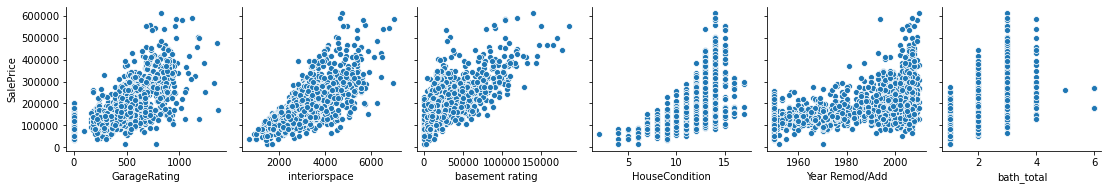

In [21]:
#Outliers

df[df['basement rating'] > 250000]
df = df.drop(960)
df = df.drop(1885)
df = df.drop(616)
df = df.drop(1035)
df = df.drop(1141)
df = df.drop(1897)

sns.pairplot(data = df ,y_vars = 'SalePrice', x_vars =['GarageRating', 'interiorspace', 'basement rating', 'HouseCondition', 'Year Remod/Add', 'bath_total'])

plt.show()


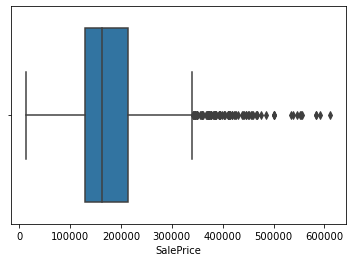

In [22]:
sns.boxplot(df['SalePrice'])

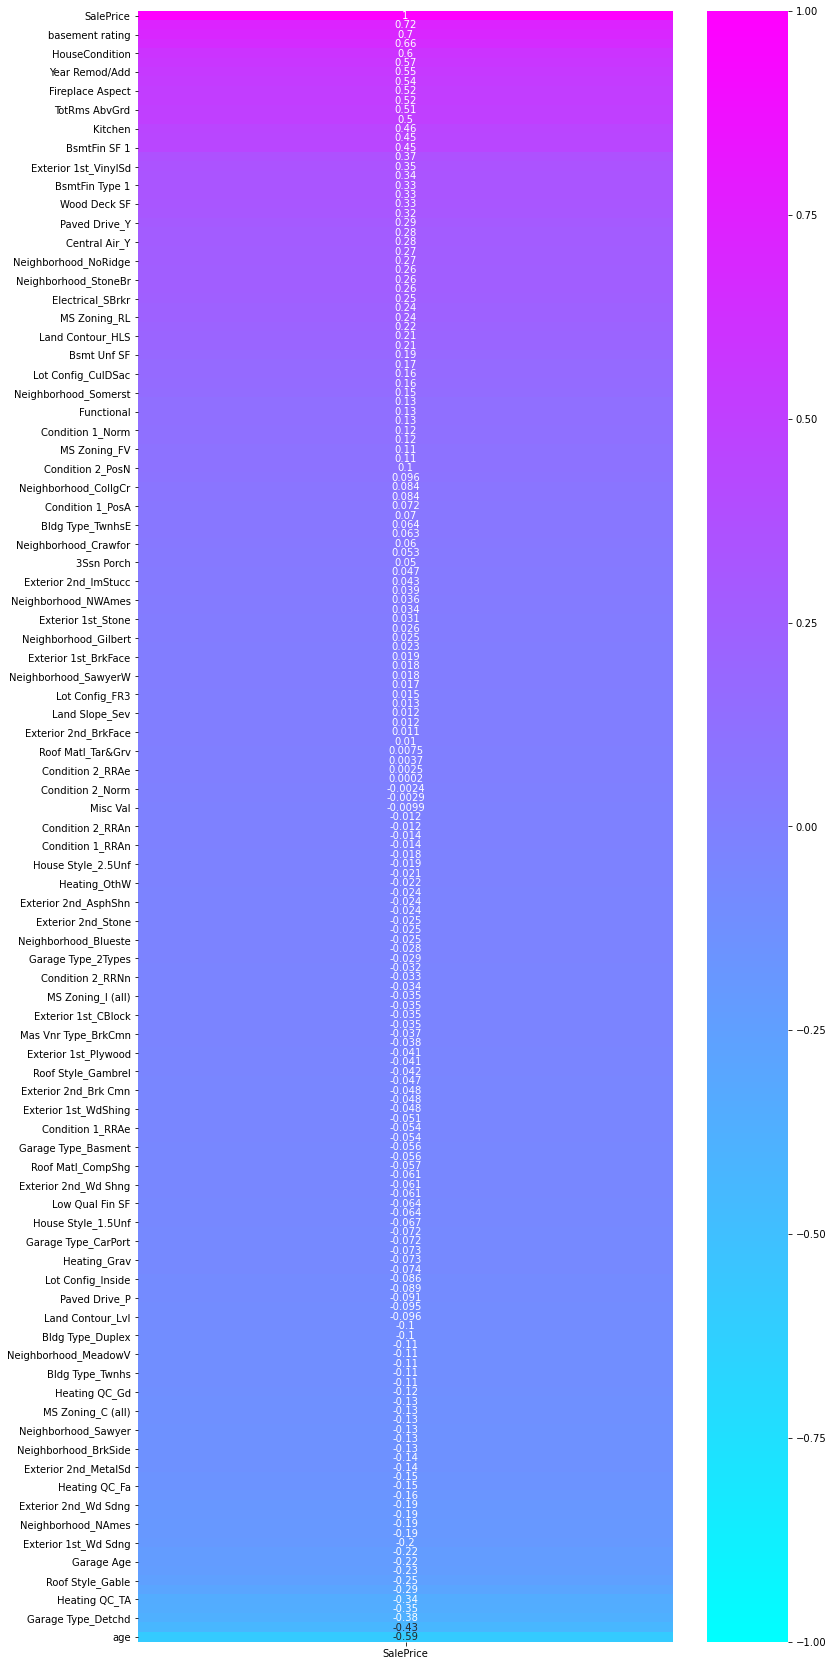

In [23]:
plt.figure(figsize = (12,30))
correlation = df.corr()
corr_sort = correlation.sort_values(by = ['SalePrice'], axis = 0, ascending = False)

cor_target = abs(correlation['SalePrice'])

sns.heatmap(corr_sort[['SalePrice']], annot = True, vmin = -1, vmax = 1, cmap = 'cool')

In [24]:
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending = False).head(60)

SalePrice               1.000000
interiorspace           0.722421
basement rating         0.697678
GarageRating            0.656455
HouseCondition          0.595035
age                     0.587444
bath_total              0.572339
Year Remod/Add          0.552546
Foundation_PConc        0.537864
Fireplace Aspect        0.518964
Mas Vnr Area            0.517623
TotRms AbvGrd           0.505786
ExteriorCondition       0.500706
Kitchen                 0.457489
Neighborhood_NridgHt    0.452907
BsmtFin SF 1            0.452829
Mas Vnr Type_None       0.431665
Garage Type_Detchd      0.380421
Garage Type_Attchd      0.365442
Foundation_CBlock       0.354325
Exterior 1st_VinylSd    0.348205
Heating QC_TA           0.344654
Exterior 2nd_VinylSd    0.343575
BsmtFin Type 1          0.333679
Open Porch SF           0.331671
Wood Deck SF            0.326665
Mas Vnr Type_Stone      0.315700
MS Zoning_RM            0.290202
Paved Drive_Y           0.289714
Half Bath               0.279677
Central Ai

In [25]:
# From the scatter plots, we can see that there are several outliers especially when it comes to the house conditions and the 
# amount of interior space there is.

# In addition, we can also infer that the assumption of linearity holds true. Therefore we can further analyze this dataset to 
# get the sale price of the house by using Linear Regression. 

In [26]:
# Top 7 Neighborhoods with the highest correlation to sales price
# Neighborhood_NridgHt
# Neighborhood_NoRidge
# Neighborhood_StoneBr
# Neighborhood_OldTown 
# Neighborhood_NAmes
# Neighborhood_IDOTRR   
# Neighborhood_Edwards